<a href="https://colab.research.google.com/github/AjayKarthi14/DSML/blob/main/Aerofit_Business_Case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

To identify the **characteristics of the target audience** for each **type of treadmill** offered by the company, to provide a better recommendation of the treadmills to the new customers.

Data on individuals who purchased a treadmill from the AeroFit stores during the prior three months is collected consisting of **180 purchase details**. 

**Product Portfolio:**


*   The KP281 is an entry-level treadmill that sells for $1,500.

*   The KP481 is for mid-level runners that sell for $1,750.

*   The KP781 treadmill is having advanced features that sell for $2,500.


# Downloading Aerofit Dataset

In [2]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749
To: /content/aerofit_treadmill.csv?1639992749
100% 7.28k/7.28k [00:00<00:00, 9.22MB/s]


In [3]:
df = pd.read_csv("aerofit_treadmill.csv?1639992749")
df.head(5)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [4]:
df.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120
179,KP781,48,Male,18,Partnered,4,5,95508,180


# Basic Observations, value counts and unique values

In [5]:
df.shape

(180, 9)

In [6]:
# There are details of 180 individuals with 9 characteristic information collected from individuals who have bought the product prior to 3 months 
# 3 String and 6 integer type characteristics collected from each individual
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [7]:
# Null values in each column
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [8]:
# Number of unique values for each 9 attribute / Column
df.nunique()

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

In [9]:
# Mean, Median, Percentile - 25:50:75, Min, Max and Standard Deviation of Integer type attributes

## Age : 18-50 with mean age is 28.78                                               ## Education : 12-21 with mean as 15.57 years 
## Usage : 2-7 with mean 3.445 times per week                                       ## Fitness : 1-5 with median rating as 3 
## Income : 29562-104581 with avaerage income of $53719.57/annum                    ## Miles : 21-360 with mean as 103.194 average miles expected each week

df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [10]:
# Unique Values in String type attribute and their respective modes/frequency
df.describe(include = 'object')

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


In [11]:
# Number of unique products available in the provided dataset
df['Product'].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

In [12]:
# Number of Male/Female in the provided dataset
df['Gender'].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

In [13]:
# Number of Single/Married in the provided dataset
df['MaritalStatus'].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

In [14]:
# Count of unique years of experience available in the provided dataset
df['Education'].value_counts()

16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: Education, dtype: int64

In [15]:
# Count of Unique number of times the customer plans to use the treadmill each week
df['Usage'].value_counts()

3    69
4    52
2    33
5    17
6     7
7     2
Name: Usage, dtype: int64

In [16]:
# Count of unique Self-rated fitness (1-5)
df['Fitness'].value_counts()

3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64

In [17]:
# Count of unique miles customer expects to walk/run each week
df['Miles'].value_counts()

85     27
95     12
66     10
75     10
47      9
106     9
94      8
113     8
53      7
100     7
180     6
200     6
56      6
64      6
127     5
160     5
42      4
150     4
38      3
74      3
170     3
120     3
103     3
132     2
141     2
280     1
260     1
300     1
240     1
112     1
212     1
80      1
140     1
21      1
169     1
188     1
360     1
Name: Miles, dtype: int64

In [18]:
# Count of unique age of individuals
df['Age'].value_counts()

25    25
23    18
24    12
26    12
28     9
35     8
33     8
30     7
38     7
21     7
22     7
27     7
31     6
34     6
29     6
20     5
40     5
32     4
19     4
48     2
37     2
45     2
47     2
46     1
50     1
18     1
44     1
43     1
41     1
39     1
36     1
42     1
Name: Age, dtype: int64

# Univariate Data Analysis and Visualisation

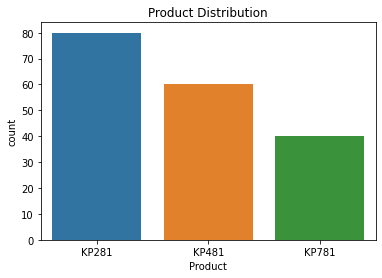

In [19]:
# Count plot on the Products in the provided dataset
# KP281 > KP481 > KP781
sns.countplot(x = 'Product' , data = df)
plt.title("Product Distribution")
plt.show()

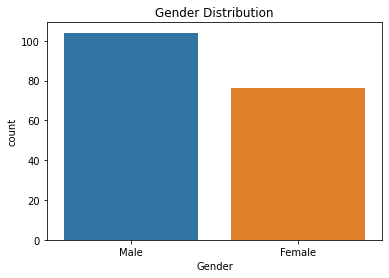

In [20]:
# Count plot on the Gender
sns.countplot(x = 'Gender' , data = df)
plt.title("Gender Distribution")
plt.show()

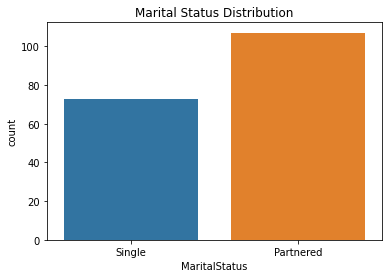

In [21]:
# Count plot on the Martial Status
sns.countplot(x = 'MaritalStatus' , data = df)
plt.title("Marital Status Distribution")
plt.show()

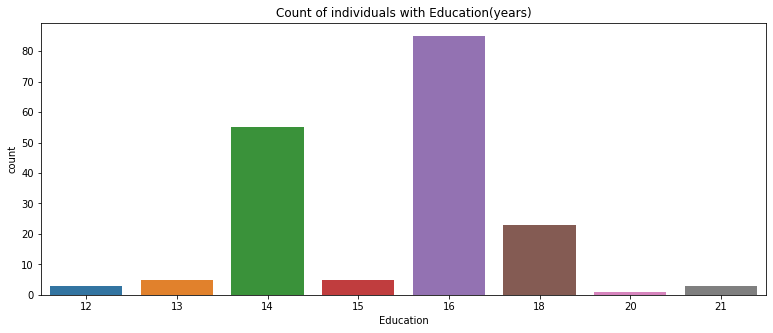

In [22]:
# Count plot on the Education years
# Most people are having mostly 14,16 or 18 years of education
plt.figure(figsize = (13,5))
sns.countplot(x = 'Education' , data = df)
plt.title("Count of individuals with Education(years)")
plt.show()

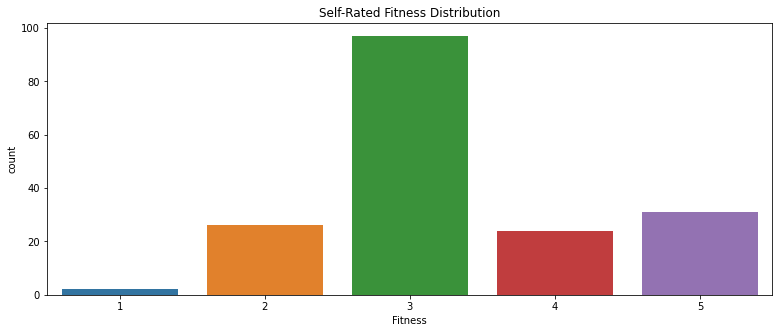

In [23]:
# Count plot on the Self-Rated Fitness
# Most individuals rate themselves with 3 in terms of fitness
plt.figure(figsize = (13,5))
sns.countplot(x = 'Fitness' , data = df)
plt.title("Self-Rated Fitness Distribution")
plt.show()

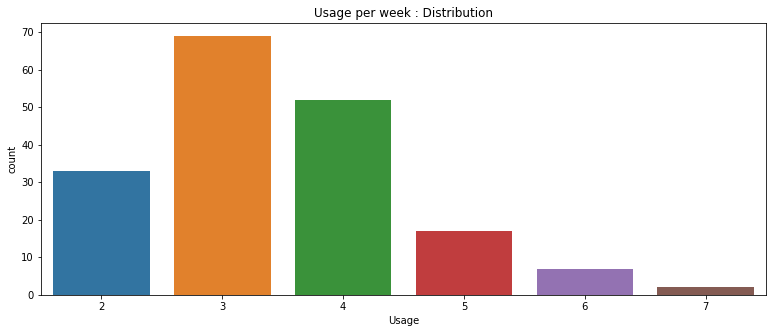

In [24]:
# Count plot on the average number of times the customer plans to use the treadmill each week
# Most individuals prefer to 2-4 times per week
plt.figure(figsize = (13,5))
sns.countplot(x = 'Usage' , data = df)
plt.title("Usage per week : Distribution")
plt.show()

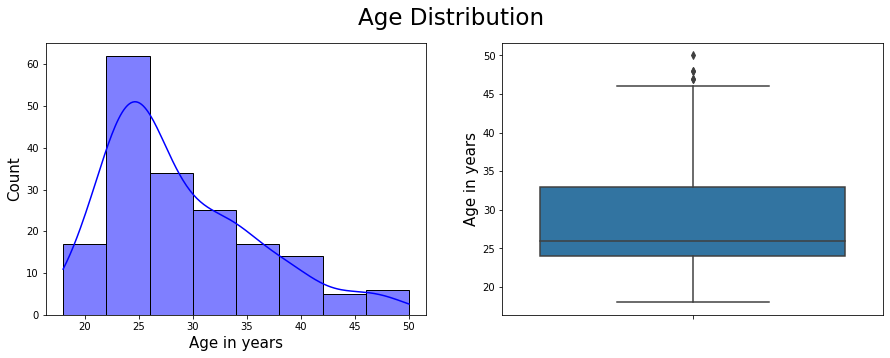

In [25]:
# Distribution of Age in years of individuals using treadmill
# Age 24-33 tend to buy treadmills and reduces drastically as the age increases
fig = plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.histplot(x = df['Age'] , bins = 8, color = 'blue' , kde = True)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Age in years' , fontsize = 15)
plt.ylabel('Count' , fontsize = 15)

plt.subplot(1,2,2)
sns.boxplot(y = df['Age'])
plt.yticks(fontsize = 10)
plt.ylabel('Age in years' , fontsize = 15)

fig.suptitle("Age Distribution" , fontsize = 23)
plt.show()

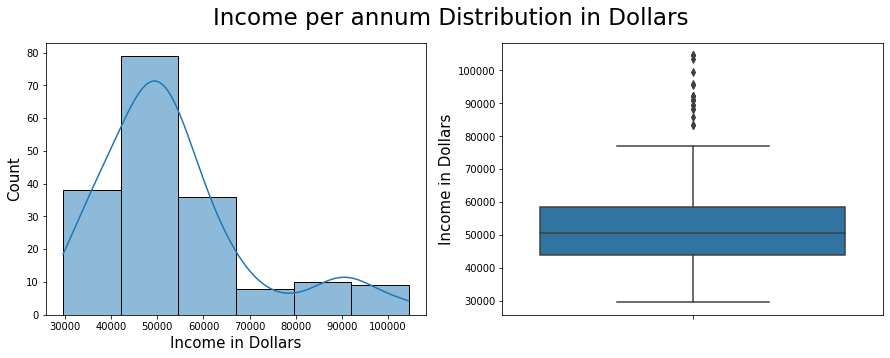

In [26]:
# Income per annum distribution in dollars
# 50% of Individuals with 43000 - 59000 dollars tend to buy treadmills
fig = plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.histplot(x = df['Income'] , bins = 6 , kde = True)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Income in Dollars' , fontsize = 15)
plt.ylabel('Count' , fontsize = 15)

plt.subplot(1,2,2)
sns.boxplot(y = df['Income'])
plt.yticks(fontsize = 10)
plt.ylabel('Income in Dollars' , fontsize = 15)

fig.suptitle("Income per annum Distribution in Dollars" , fontsize = 23)
plt.show()

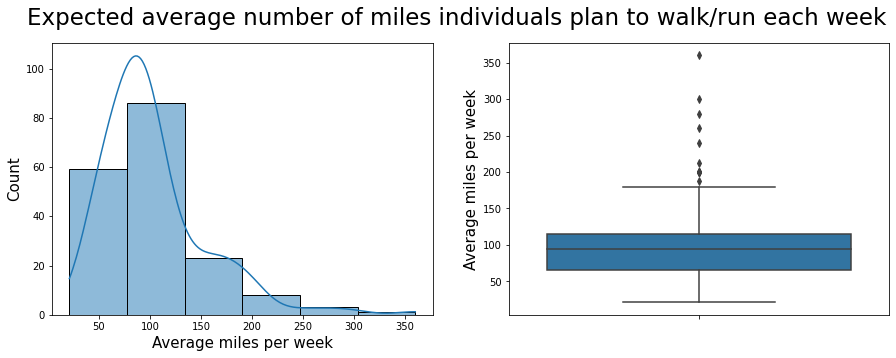

In [27]:
# Expected average number of miles individuals plan to walk/run each week
# 50% of individuals plan to run/walk 70-120 miles per week 
fig = plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.histplot(x = df['Miles'] , bins = 6 , kde = True)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Average miles per week' , fontsize = 15)
plt.ylabel('Count' , fontsize = 15)

plt.subplot(1,2,2)
sns.boxplot(y = df['Miles'])
plt.yticks(fontsize = 10)
plt.ylabel('Average miles per week' , fontsize = 15)

fig.suptitle("Expected average number of miles individuals plan to walk/run each week" , fontsize = 23)
plt.show()

# Bivariate and multivariate Visualisation

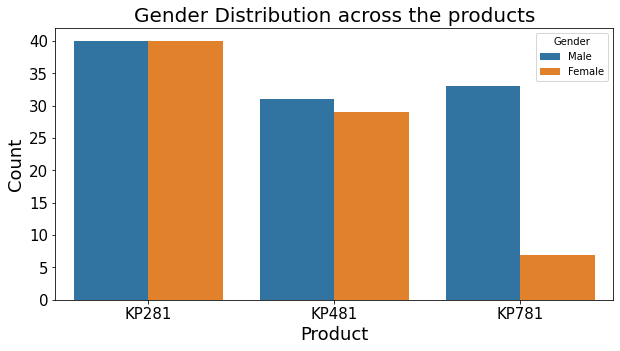

In [28]:
# Gender Distribution across the products
# KP281 and KP481 have equal distribution of male and female
# KP781 is preferred mostly by male
# Female prefer KP281 and KP481 models than KP781 treadmill model

plt.figure(figsize = (10,5))
sns.countplot(x = 'Product' , data = df , hue = 'Gender')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Product' , fontsize = 18)
plt.ylabel('Count' , fontsize = 18)
plt.title("Gender Distribution across the products" , fontsize = 20)
plt.show()

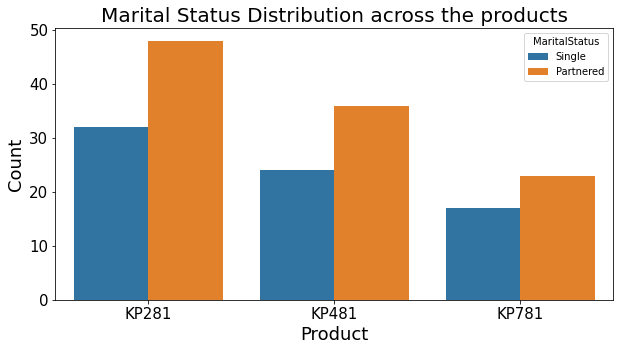

In [29]:
# Marital Status Distribution across the products
# Parented individuals seem to buy treadmills compared to Single Individuals

plt.figure(figsize = (10,5))
sns.countplot(x = 'Product' , data = df , hue = 'MaritalStatus')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Product' , fontsize = 18)
plt.ylabel('Count' , fontsize = 18)
plt.title("Marital Status Distribution across the products" , fontsize = 20)
plt.show()

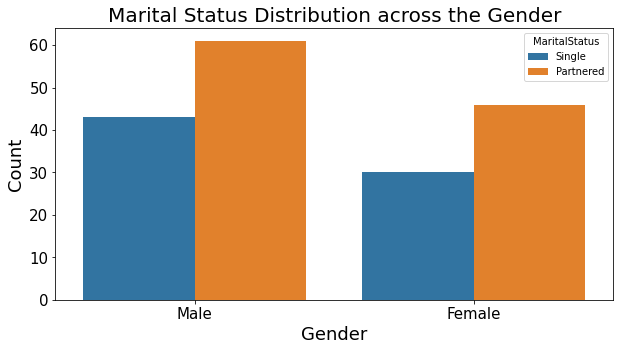

In [30]:
# Marital Status Distribution across the Gender
# Ratio of Single to parented seems to be same for both male and female 

plt.figure(figsize = (10,5))
sns.countplot(x = 'Gender' , data = df , hue = 'MaritalStatus')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Gender' , fontsize = 18)
plt.ylabel('Count' , fontsize = 18)
plt.title("Marital Status Distribution across the Gender" , fontsize = 20)
plt.show()

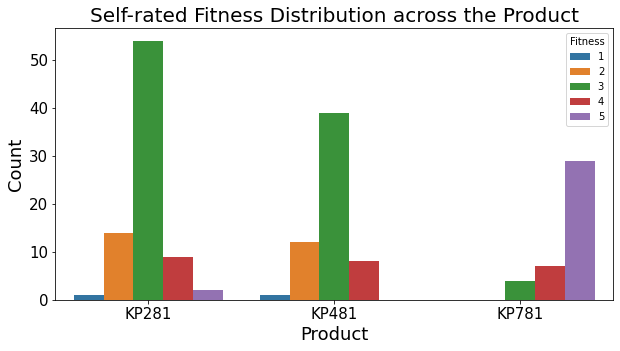

In [31]:
# Self-rated Fitness Distribution across the Product
# Individuals Who have rate their fitness level more (especially with rating as 5) prefer to buy KP781 model and no people with rating 1 and 2 prefer KP781 modes as expected

plt.figure(figsize = (10,5))
sns.countplot(x = 'Product' , data = df , hue = 'Fitness')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Product' , fontsize = 18)
plt.ylabel('Count' , fontsize = 18)
plt.title("Self-rated Fitness Distribution across the Product" , fontsize = 20)
plt.show()

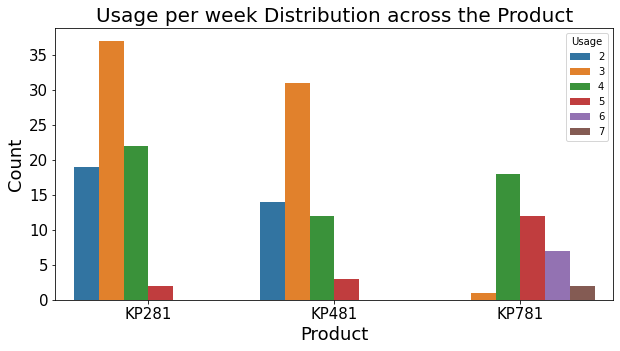

In [32]:
# Usage per week Distribution across the Product
# Individuals who have planned to use 2-4 times prefer KP281 or KP481 models whereas individuals who expect to use 4-7 times a week prefer to buy KP781 model

plt.figure(figsize = (10,5))
sns.countplot(x = 'Product' , data = df , hue = 'Usage')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Product' , fontsize = 18)
plt.ylabel('Count' , fontsize = 18)
plt.title("Usage per week Distribution across the Product" , fontsize = 20)
plt.show()

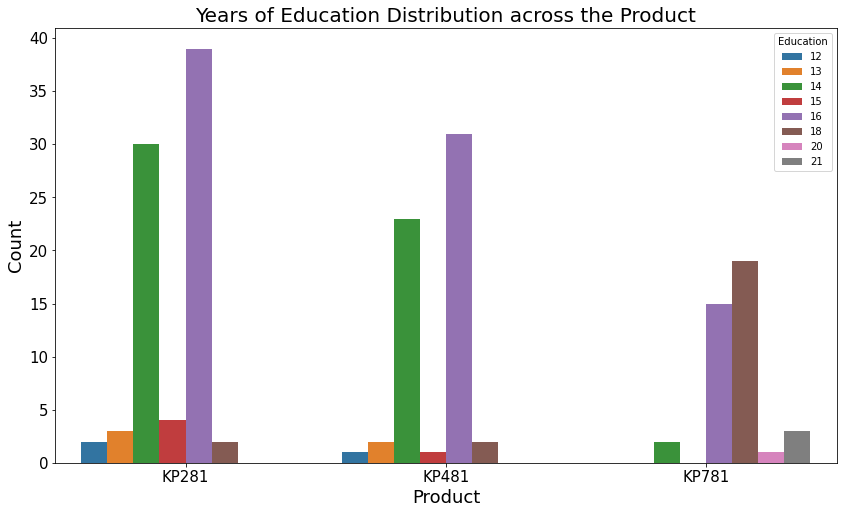

In [33]:
# Years of Education Distribution across the Product
# 14 and 16 years of Education prefer KP281 and KP481 whereas individuals with education 18,20 and 21 years prefer KP781 model  

plt.figure(figsize = (14,8))
sns.countplot(x = 'Product' , data = df , hue = 'Education')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Product' , fontsize = 18)
plt.ylabel('Count' , fontsize = 18)
plt.title("Years of Education Distribution across the Product" , fontsize = 20)
plt.show()

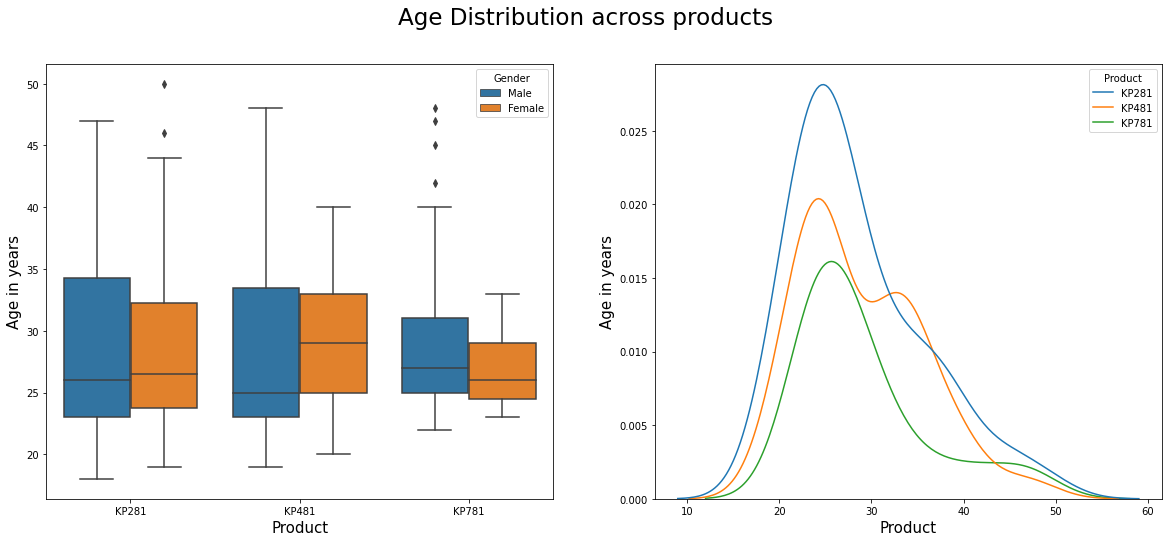

In [34]:
# Age Distribution across products
# Older and very young age people prefer either KP281 or KP481 models whereas KP781 models are preferred by age groups(23-36)

fig = plt.figure(figsize = (20,8))

plt.subplot(1,2,1)
sns.boxplot(y = 'Age' , data = df , x = 'Product' , hue = 'Gender')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Product' , fontsize = 15)
plt.ylabel('Age in years' , fontsize = 15)

plt.subplot(1,2,2)
sns.kdeplot(x = 'Age' , data = df , hue = 'Product' )
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Product' , fontsize = 15)
plt.ylabel('Age in years' , fontsize = 15)

fig.suptitle("Age Distribution across products" , fontsize = 23)
plt.show()

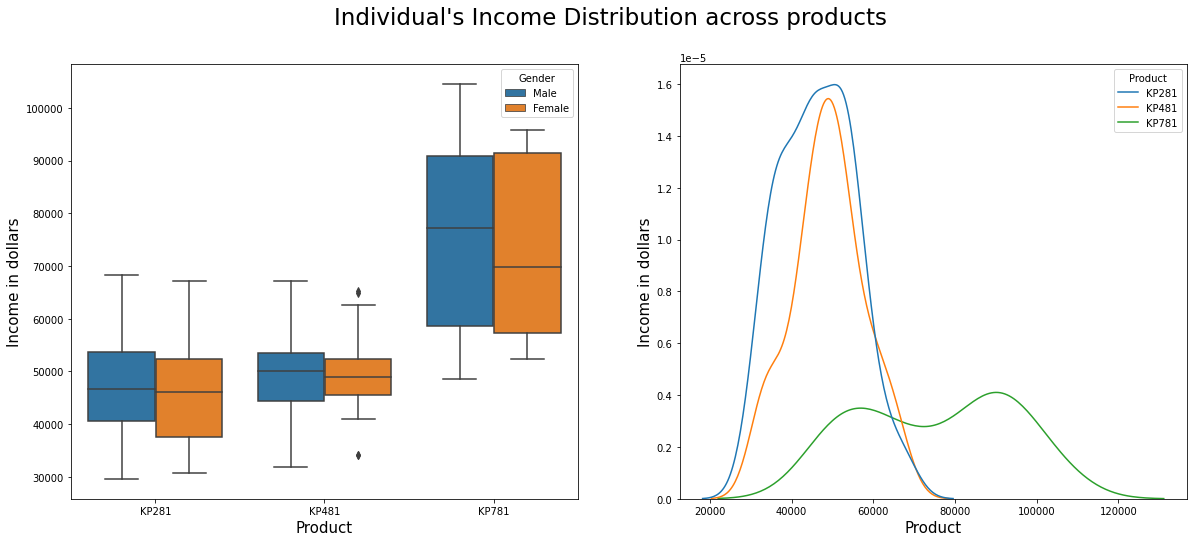

In [35]:
# Individual's Income Distribution across products
# High Income individuals prefer KP781 model whereas low to medium income Individuals prefer KP281 and KP481 models of treadmill

fig = plt.figure(figsize = (20,8))

plt.subplot(1,2,1)
sns.boxplot(y = 'Income' , data = df , x = 'Product' , hue = 'Gender')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Product' , fontsize = 15)
plt.ylabel('Income in dollars' , fontsize = 15)

plt.subplot(1,2,2)
#sns.barplot(y = 'Income' , data = df , x = 'Product', estimator = np.mean )
sns.kdeplot(x = 'Income' , data = df , hue = 'Product')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Product' , fontsize = 15)
plt.ylabel('Income in dollars' , fontsize = 15)

fig.suptitle("Individual's Income Distribution across products" , fontsize = 23)
plt.show()

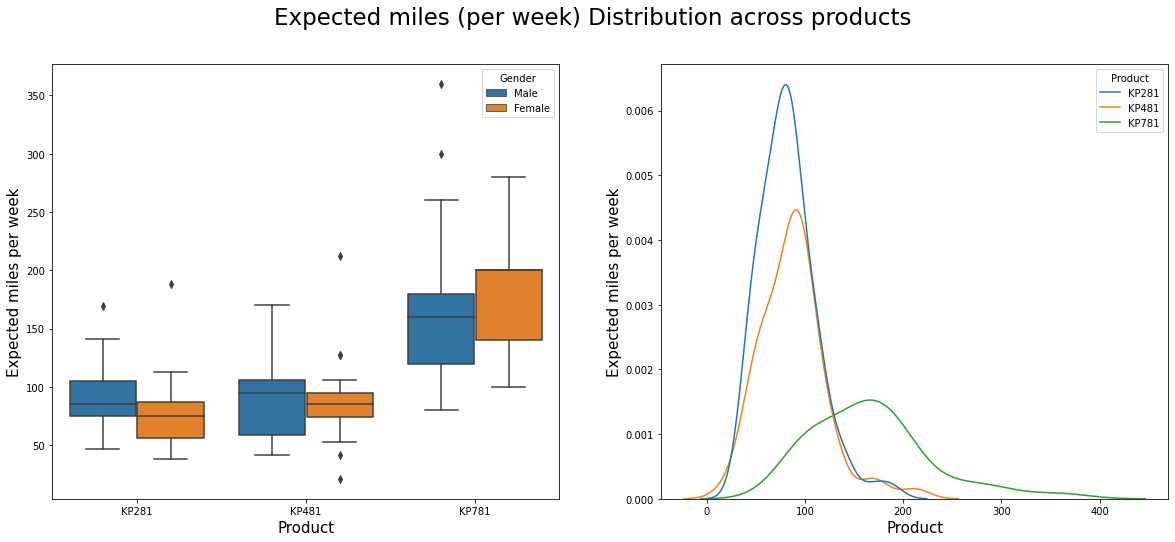

In [36]:
# Expected miles (per week) Distribution across products
# Individuals who prefer to walk/run less than 140 miles/week prefer KP281 or KP481 whereas individuals wko prefer to walk/run more than 140 miles/week prefer KP781 model

fig = plt.figure(figsize = (20,8))

plt.subplot(1,2,1)
sns.boxplot(y = 'Miles' , data = df , x = 'Product', hue = 'Gender')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Product' , fontsize = 15)
plt.ylabel('Expected miles per week' , fontsize = 15)

plt.subplot(1,2,2)
#sns.barplot(y = 'Miles' , data = df , x = 'Product', estimator = np.mean )
sns.kdeplot(x = 'Miles' , data = df , hue = 'Product')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Product' , fontsize = 15)
plt.ylabel('Expected miles per week' , fontsize = 15)

fig.suptitle("Expected miles (per week) Distribution across products" , fontsize = 23)
plt.show()

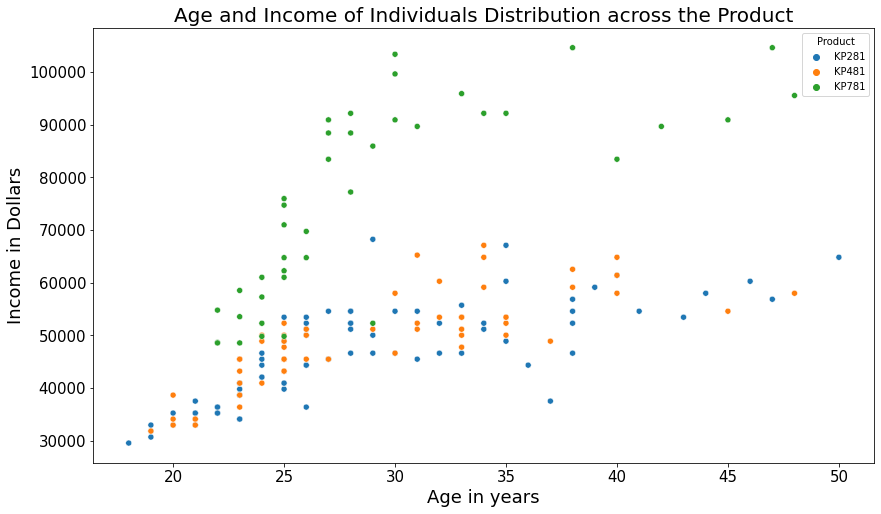

In [37]:
# Age and Income of Individuals Distribution across the Product
# Above $65000 tend to buy KP781 model irrespective of age whereas below $65000 tend to buy either KP281 or KP481

plt.figure(figsize = (14,8))
sns.scatterplot(x = 'Age' , y = 'Income' , data = df , hue = 'Product')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Age in years' , fontsize = 18)
plt.ylabel('Income in Dollars' , fontsize = 18)
plt.title("Age and Income of Individuals Distribution across the Product" , fontsize = 20)
plt.show()

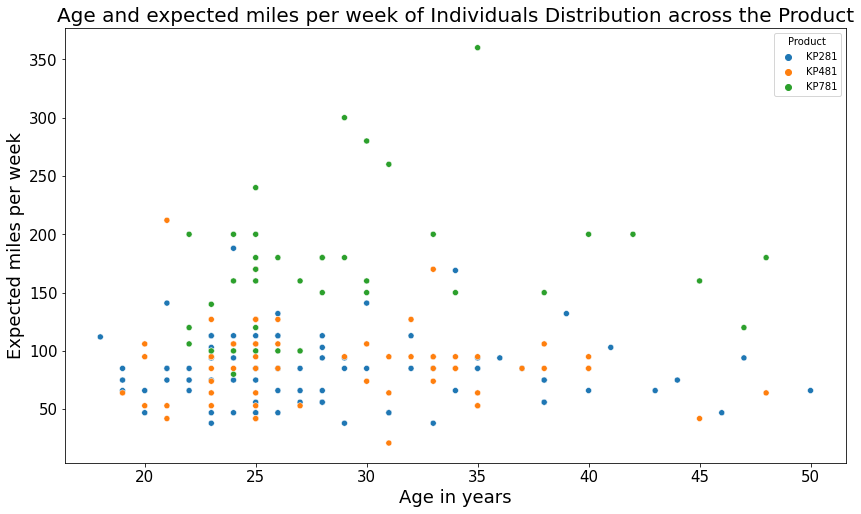

In [38]:
# Age and expected miles per week of Individuals Distribution across the Product

plt.figure(figsize = (14,8))
sns.scatterplot(x = 'Age' , y = 'Miles' , data = df , hue = 'Product')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Age in years' , fontsize = 18)
plt.ylabel('Expected miles per week' , fontsize = 18)
plt.title("Age and expected miles per week of Individuals Distribution across the Product" , fontsize = 20)
plt.show()

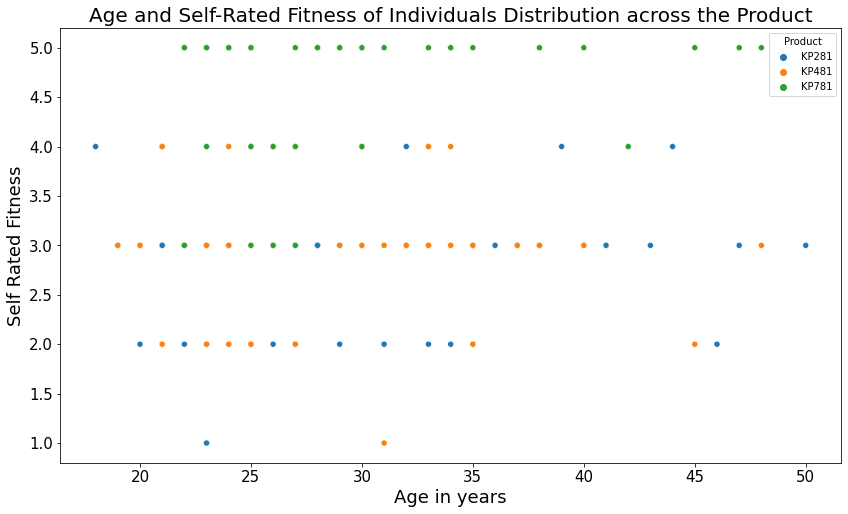

In [39]:
# Age and Self-Rated Fitness of Individuals Distribution across the Product

plt.figure(figsize = (14,8))
sns.scatterplot(x = 'Age' , y = 'Fitness' , data = df , hue = 'Product')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Age in years' , fontsize = 18)
plt.ylabel('Self Rated Fitness' , fontsize = 18)
plt.title("Age and Self-Rated Fitness of Individuals Distribution across the Product" , fontsize = 20)
plt.show()

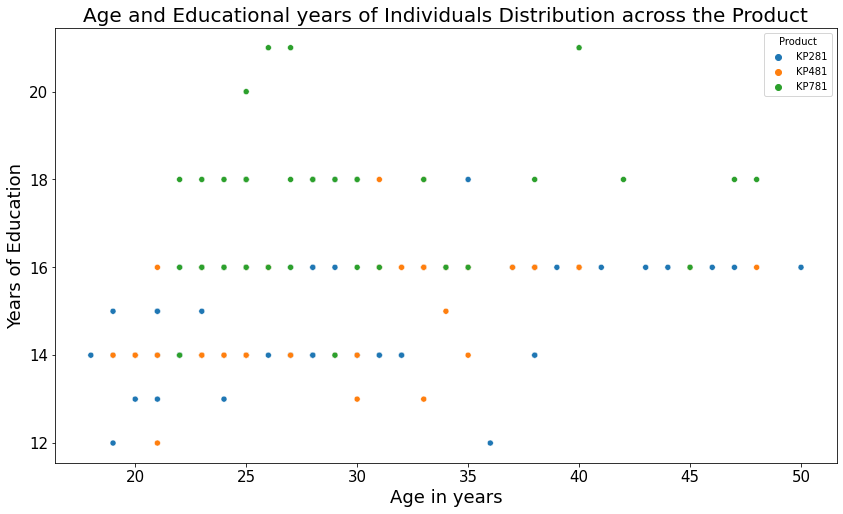

In [40]:
#Age and Educational years of Individuals Distribution across the Product

plt.figure(figsize = (14,8))
sns.scatterplot(x = 'Age' , y = 'Education' , data = df , hue = 'Product')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Age in years' , fontsize = 18)
plt.ylabel('Years of Education' , fontsize = 18)
plt.title("Age and Educational years of Individuals Distribution across the Product" , fontsize = 20)
plt.show()

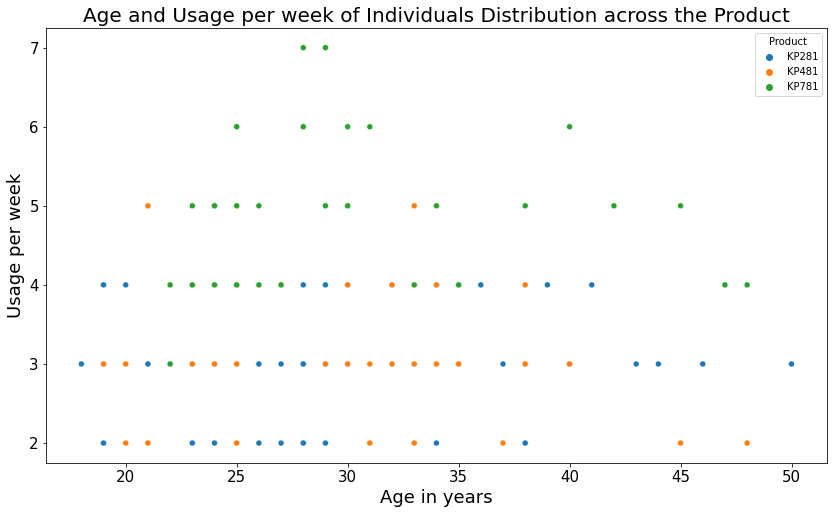

In [41]:
plt.figure(figsize = (14,8))
sns.scatterplot(x = 'Age' , y = 'Usage' , data = df , hue = 'Product')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Age in years' , fontsize = 18)
plt.ylabel('Usage per week' , fontsize = 18)
plt.title("Age and Usage per week of Individuals Distribution across the Product" , fontsize = 20)
plt.show()

# Correlation - heatmaps & pairplots 

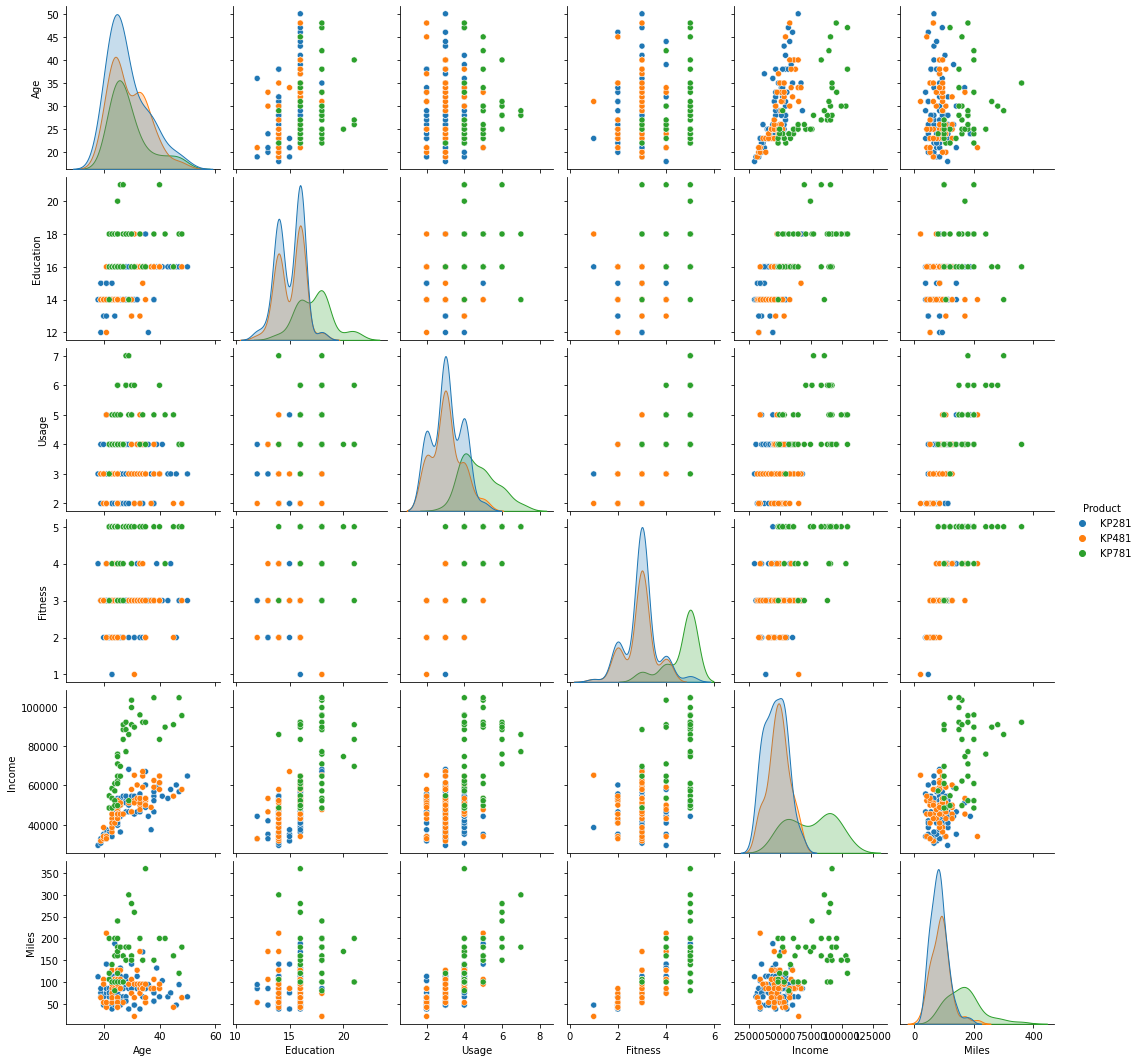

In [42]:
sns.pairplot(data=df ,hue = 'Product')
plt.show()

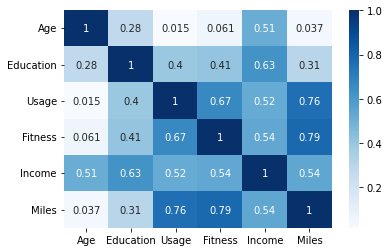

In [43]:
# Fitness with miles has correlation 79% +ve    # Usage with miles has a correlation of 76% +ve       # Usage with Fitness has a correlation of 67% +ve
# Income with Education has a corelation of 63% +ve

sns.heatmap(df.corr(), cmap= "Blues", annot=True)
plt.show()

# Probability and Customer Profiling

In [44]:
# KP281 - 44.44%        KP481 - 33.33%       KP781 - 22.22%

pd.crosstab(index = df['Product'] , columns = df['Product'] , margins = True)

Product,KP281,KP481,KP781,All
Product,,,,
KP281,80,0,0,80
KP481,0,60,0,60
KP781,0,0,40,40
All,80,60,40,180


In [45]:
# Given KP281 - 50.00% - male & 50.00% - Female buy this product            Given Male - 38.46% buy KP281 model            Given Female - 52.63% buy KP281 model
# Given KP481 - 48.33% - male & 51.67% - Female buy this product            Given Male - 29.80% buy KP481 model            Given Female - 38.16% buy KP481 model
# Given KP781 - 82.50% - male & 17.50% - Female buy this product            Given Male - 31.73% buy KP781 model            Given Female - 09.21% buy KP781 model

pd.crosstab(index = df['Product'] , columns = df['Gender'] , margins = True)

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


In [46]:
# 53.89% , 17.22% , 14.44% and 13.33% individuals rate themselves with fitness rating 3 , 5 , 2 and 4 respectively
# Given Self Rating as 3    -     55.67% prefer KP281 model     40.02% prefer KP481 model     04.12% prefer KP781 model
# Given Self Rating as 5    -     06.45% prefer KP281 model     00.00% prefer KP481 model     93.55% prefer KP781 model
# Given Self Rating as 2    -     53.85% prefer KP281 model     46.15% prefer KP481 model     00.00% prefer KP781 model
# Given KP281    -     67.85% and 17.50%  individuals rate themselves with fitness rating 3 and 2 respectively  
# Given KP481    -     65.00% and 20.00%  individuals rate themselves with fitness rating 3 and 2 respectively  
# Given KP781    -     72.50% and 17.50%  individuals rate themselves with fitness rating 5 and 4 respectively   

pd.crosstab(index = df['Product'] , columns = df['Fitness'] , margins = True)

Fitness,1,2,3,4,5,All
Product,,,,,,
KP281,1,14,54,9,2,80
KP481,1,12,39,8,0,60
KP781,0,0,4,7,29,40
All,2,26,97,24,31,180


In [47]:
# 38.33% , 28.89% , 18.33% and 9.44% individuals expect to use 3, 4 , 2 and 5 times per week respectively
#  Given KP281 - 73.75% Expect usage as 3 or 4      Given KP481 - 75% Expect usage as 2 or 3      Given KP781 - 75% Expect usage as 4 or 5
# Individuals who expect to use 6 or 7 times prefer KP781 model      

pd.crosstab(index = df['Product'] , columns = df['Usage'] , margins = True)

Usage,2,3,4,5,6,7,All
Product,,,,,,,
KP281,19,37,22,2,0,0,80
KP481,14,31,12,3,0,0,60
KP781,0,1,18,12,7,2,40
All,33,69,52,17,7,2,180


In [48]:
# 47.22% , 30.56% and 12.78%  have years of education as 16 , 14 and 18 respectively
# Given KP281 - 86.25% Individuals have years of education as 16 or 14
# Given KP481 - 90.00% Individuals have years of education as 16 or 14
# Given KP781 - 85.00% Individuals have years of education as 18 or 16

pd.crosstab(index = df['Product'] , columns = df['Education'] , margins = True)

Education,12,13,14,15,16,18,20,21,All
Product,,,,,,,,,
KP281,2,3,30,4,39,2,0,0,80
KP481,1,2,23,1,31,2,0,0,60
KP781,0,0,2,0,15,19,1,3,40
All,3,5,55,5,85,23,1,3,180


In [49]:
# Given Single    -   43.84% , 32.88% and 23.29% prefer KP281 , KP481 and KP781 models respectively
# Given Parented  -   44.86% , 33.64% and 21.50% prefer KP281 , KP481 and KP781 models respectively
# Given KP281     -   60.00% and 40.00% are Parented and Single respectively
# Given KP481     -   60.00% and 40.00% are Parented and Single respectively
# Given KP781     -   57.50% and 42.50% are Parented and Single respectively

pd.crosstab(index = df['Product'] , columns = df['MaritalStatus'] , margins = True)

MaritalStatus,Partnered,Single,All
Product,,,
KP281,48,32,80
KP481,36,24,60
KP781,23,17,40
All,107,73,180


In [50]:
df_KP281 = df[df['Product'] == 'KP281']
df_KP481 = df[df['Product'] == 'KP481']
df_KP781 = df[df['Product'] == 'KP781']

# Given KP281 and Female    -   67.5% and 32.5% individuals are Partnered and Single Respectively
# Given KP281 and Male      -   52.5% and 47.5% individuals are Partnered and Single Respectively

pd.crosstab(index = df_KP281['Gender'] , columns = df_KP281['MaritalStatus'] , margins = True)

MaritalStatus,Partnered,Single,All
Gender,,,
Female,27,13,40
Male,21,19,40
All,48,32,80


In [51]:
# Given KP481 and Female    -   51.72% and 48.28% individuals are Partnered and Single Respectively
# Given KP481 and Male      -   67.74% and 32.26% individuals are Partnered and Single Respectively

pd.crosstab(index = df_KP481['Gender'] , columns = df_KP481['MaritalStatus'] , margins = True)

MaritalStatus,Partnered,Single,All
Gender,,,
Female,15,14,29
Male,21,10,31
All,36,24,60


In [52]:
# Given KP781 and Female    -   57.14% and 42.86% individuals are Partnered and Single Respectively
# Given KP781 and Male      -   57.58% and 42.42% individuals are Partnered and Single Respectively

pd.crosstab(index = df_KP781['Gender'] , columns = df_KP781['MaritalStatus'] , margins = True)

MaritalStatus,Partnered,Single,All
Gender,,,
Female,4,3,7
Male,19,14,33
All,23,17,40


In [53]:
# Creating Bins for the attributes Age, Income and Miles
bins1 = [15,20,25,30,35,40,45,50]
labels1 = ['15-20','20-25','25-30','30-35','35-40','40-45','45-50']
df['Age_bins'] = pd.cut(df['Age'],bins=bins1,labels=labels1)

bins2 = [25000,40000,55000,70000,85000,100000,115000]
labels2 = ['25000-40000','40000-55000','55000-70000','70000-85000','85000-100000','100000-115000']
df['Income_bins'] = pd.cut(df['Income'],bins=bins2,labels=labels2)

bins3 = [20,80,140,200,260,320,380]
labels3 = ['20-80','80-140','140-200','200-260','260-320','320-380']
df['Miles_bins'] = pd.cut(df['Miles'],bins=bins3,labels=labels3)

df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_bins,Income_bins,Miles_bins
0,KP281,18,Male,14,Single,3,4,29562,112,15-20,25000-40000,80-140
1,KP281,19,Male,15,Single,2,3,31836,75,15-20,25000-40000,20-80
2,KP281,19,Female,14,Partnered,4,3,30699,66,15-20,25000-40000,20-80
3,KP281,19,Male,12,Single,3,3,32973,85,15-20,25000-40000,80-140
4,KP281,20,Male,13,Partnered,4,2,35247,47,15-20,25000-40000,20-80


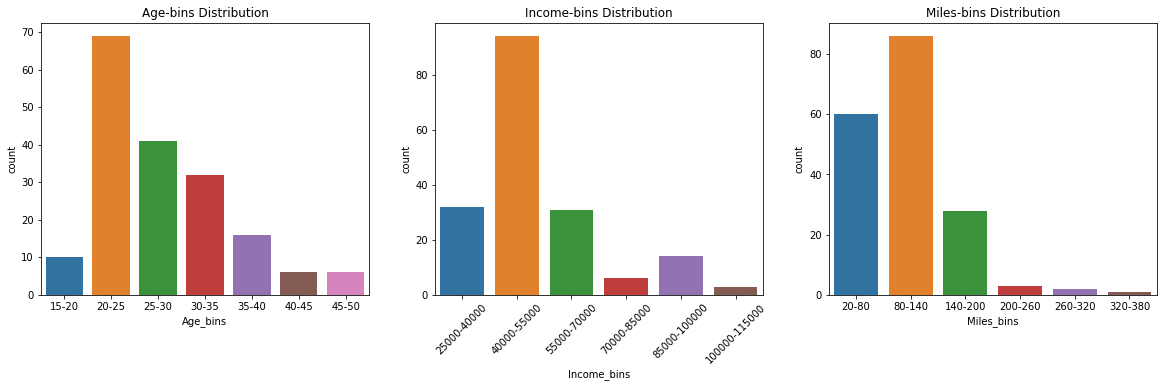

In [54]:
# Count plot of Age, Income and Miles Category
fig = plt.figure(figsize = (20,5))

plt.subplot(1,3,1)
sns.countplot(x = 'Age_bins' , data = df)
plt.title("Age-bins Distribution")

plt.subplot(1,3,2)
sns.countplot(x = 'Income_bins' , data = df)
plt.xticks(rotation = 45)
plt.title("Income-bins Distribution")

plt.subplot(1,3,3)
sns.countplot(x = 'Miles_bins' , data = df)
plt.title("Miles-bins Distribution")

plt.show()

In [55]:
# Given KP281 model - 48.75% Individuals who have preferred are in the age group 20-30
# Given KP481 model - 68.33% Individuals who have preferred are in the age group 20-25 and 30-35
# Given KP781 model - 75.00% Individuals who have preferred are in the age group 20-30

pd.crosstab(index = df['Product'] , columns = df['Age_bins'] , margins = True)

Age_bins,15-20,20-25,25-30,30-35,35-40,40-45,45-50,All
Product,,,,,,,,
KP281,6,28,21,11,8,3,3,80
KP481,4,24,7,17,6,1,1,60
KP781,0,17,13,4,2,2,2,40
All,10,69,41,32,16,6,6,180


In [56]:
# Given KP281 - 86.25% Individuals have income in range $25000 - $55000 per annum
# Given KP481 - 85.00% Individuals have income in range $40000 - $70000 per annum
# Given KP781 - 50.00% Individuals have income in range $70000 - $100000 per annum and 42.50% Individuals have income in range $40000 - $70000 per annum

pd.crosstab(index = df['Product'] , columns = df['Income_bins'] , margins = True)

Income_bins,25000-40000,40000-55000,55000-70000,70000-85000,85000-100000,100000-115000,All
Product,,,,,,,
KP281,23,46,11,0,0,0,80
KP481,9,39,12,0,0,0,60
KP781,0,9,8,6,14,3,40
All,32,94,31,6,14,3,180


In [57]:
# Given KP281 - 95% Individuals Expect to walk/run 20-140 miles per week
# Given KP481 - 95% Individuals Expect to walk/run 20-140 miles per week
# Given KP781 - 85% Individuals Expect to walk/run 80-200 miles per week

pd.crosstab(index = df['Product'] , columns = df['Miles_bins'] , margins = True)

Miles_bins,20-80,80-140,140-200,200-260,260-320,320-380,All
Product,,,,,,,
KP281,38,38,4,0,0,0,80
KP481,21,36,2,1,0,0,60
KP781,1,12,22,2,2,1,40
All,60,86,28,3,2,1,180


In [58]:
# Given KP281 - 77.50% Individuals Expect to walk/run 20-100 miles per week
# Given KP481 - 65.00% Individuals Expect to walk/run 70-140 miles per week
# Given KP781 - 50.00% Individuals Expect to walk/run 110-200 miles per week

print(len(df[(df['Miles']<100) & (df['Product'] == 'KP281')]) , len(df[(df['Miles']>70) & (df['Product'] == 'KP481') & (df['Miles']<140)]) , len(df[(df['Miles']>110)  & (df['Miles']<200) & (df['Product'] == 'KP781')]) )

62 39 20




---



---




> ***Customer Profiling for the KP281, KP481 and KP781 models of Treadmill***



---


---


**Customers Of KP281 treadmill model:**



*   **Age :** 20 - 35 ( Almost 50% Individuals are from 20-30 age)
*   **Gender:** 50% each are Male and Female
*   **Education:** 86.25% Individuals have years of education either 16 or 14 years
*   **Marital Status:** 1:1 and 2:1 ratio are Partered:Single for Male and Female respectively
*   **Usage:** 73.75% expect to use 3 or 4 per week 
*   **Income:** 86.25% Individuals have income in range \$ 25000 - \$ 55000 per annum
*   **Fitness:** 67.85% and 17.50%  individuals rate themselves with fitness rating 3 and 2 respectively  
*   **Miles:** 77.50% Individuals Expect to walk/run 20-100 miles per week




---




**Customers Of KP481 treadmill model:**



*   **Age :** 20 - 25 and 30 - 35 (68.33% Individuals)
*   **Gender:** 48:52 ratio of Male to Female
*   **Education:** 90.00% Individuals have years of education as 16 or 14 years
*   **Marital Status:** 2:1 and 1:1 ratio are Partered:Single for Male and Female respectively
*   **Usage:** 75% expect to use 2 or 3 per week 
*   **Income:** 85.00% Individuals have income in range \$ 40000 - \$ 70000 per annum
*   **Fitness:** 65.00% and 20.00%  individuals rate themselves with fitness rating 3 and 2 respectively
*   **Miles:** 65.00% Individuals Expect to walk/run 70-140 miles per week



---




**Customers Of KP781 treadmill model:**



*   **Age :** 20 - 30 (75.00% Individuals)
*   **Gender:** 82.50% - Male & 17.50% - Female
*   **Education:** 85.00% Individuals have years of education as 18 or 16 years
*   **Marital Status:** 58:42 ratio are Partered:Single for Male and Female
*   **Usage:** 75% expect to use as 4 or 5 times per week
*   **Income:** 50.00% Individuals have income in range \$ 70000 - \$ 100000 per annum and 42.50% Individuals have income in range \$ 40000 - \$ 70000 per annum
*   **Fitness:** 72.50% and 17.50%  individuals rate themselves with fitness rating 5 and 4 respectively  
*   **Miles:** 85% Individuals Expect to walk/run 80-200 miles per week




---



# Business Insights and Recommendations

**Insights:**

1.	Age does not influence in choosing the treadmill models.
2.	KP281 and KP481 models have equal interest from both male and female whereas KP781 model is preferred mostly by male.
3.	Marital Status does not seem to affect the preferences there is a constant 2:1 ratio of Partnered to Single in all the models from the data provided.
4.	Individuals with education 14, 16 or 18 prefer to buy models comparatively. We cannot come to any conclusion about the model preferences with educational years.
5.	Individuals who prefer to use 3-4 times a week prefer either KP281 or KP481 model whereas it was 4-6 times for KP781 model.
6.	Lower income group (\$25000 - \$55000) prefer KP281 model, middle income individuals (\$40000 - \$70000) prefer KP481 model and higher income people (\$60000 - \$100000) prefer KP781 model.
7.	Individuals who rate their fitness as 2 or 3 prefer KP281 or KP481 model whereas people who weight their fitness more as 4 or 5 prefer KP781 model.
8.	 Individuals who plan to walk/run 20-100 miles (lower) per week prefer KP281 model, 70-140 miles per week (middle) prefer KP481 and 80-200 miles per week prefer KP781 model.
9.	Fitness with miles and usage have approximately 70% positive correlation.

**Recommendations:**

1.	Age, Gender, Education and Marital status does not seem to influence the preference of the treadmill model but for KP781 model the individual’s gender were mostly male.
2.	Analysing the usage, self-fitness ratings, expected miles they prefer to walk/run per week and the income per annum of the individual can provide us a great picture of the target customers.
3.	We can recommend individuals who prefer to use 3-4 times a week, self-fitness rating as 2 or 3, 20-100 miles per week and an annual income in the range of \$25000 - \$55000 to buy KP281 model and we can also push recommendations of higher model KP481 treadmill.
4.	We can recommend individuals who prefer to use 3-4 times a week, self-fitness rating as 2 or 3, 70-140 miles per week and an annual income in the range of \$40000 - \$70000 to buy KP481 model and we can also push recommendations of higher model KP781 treadmill.
5.	We can recommend individuals who prefer to use 4-5 times a week, self-fitness rating as 4 or 5, 80-200 miles per week and an annual income in the range of \$70000 - \$100000 to buy KP781 model.
